## Context

An e-commerce company based in the United Kingdom would like to extract some insights from their customer data for the past year. They would like to find out if there are specific areas they should focus on or improve to increase their revenue. They have hired you to help them figure out!

In this notebook we seek to answer a few questions:

1: Sales performance analysis
- What are the sales or revenue trend over time?
- Which countries contributed the most revenue?
- What are the top selling products?
- How many refunds were there?

2: Customer behavior analysis
- How many unique customers were there in the last year?
- Which customers generated the highest revenue?
- Which customers contributed the most refunds?

3: What are some strategies we can utilise to potentially improve sales?

Let's dive into the data!

### Loading relevant libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import locale

### Data preprocessing

In [63]:
# reading csv file
df = pd.read_csv('ecommerce_data.csv')

In [64]:
# quick quantitative summary of data in dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [65]:
# taking a look at top 5 rows in dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [66]:
# concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [67]:
# creation of missing values dataframe for visualisation
df_msn = pd.DataFrame(df.isna().sum())
df_msn

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [68]:
# removing NaN values in CustomerID
df.dropna(subset=['CustomerID'], inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [69]:
df.drop(df.query('Description in ["POSTAGE", "CARRIAGE", "Discount", "DOTCOM POSTAGE", "CRUK Commission", "Manual"]').index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404925 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    404925 non-null  object 
 1   StockCode    404925 non-null  object 
 2   Description  404925 non-null  object 
 3   Quantity     404925 non-null  int64  
 4   InvoiceDate  404925 non-null  object 
 5   UnitPrice    404925 non-null  float64
 6   CustomerID   404925 non-null  float64
 7   Country      404925 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.8+ MB


In [70]:
# display unique values in Country column
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [71]:
# dropping Unspecified values in Country column
df.drop(df[df['Country'] == "Unspecified"].index, inplace=True)


In [72]:
# adjusting initials of countries to proper names
df.loc[df['Country'] == "EIRE", "Country"] = "Ireland"
df.loc[df['Country'] == "USA", "Country"] = "United States of America"
df.loc[df['Country'] == "RSA", "Country"] = "South Africa"

In [73]:
# checking unique values in Country column
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Brazil', 'United States of America', 'European Community',
       'Bahrain', 'Malta', 'South Africa'], dtype=object)

In [74]:
# changing datatypes of InvoiceDate to datetime, CustomerID to integer
df = df.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404681 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    404681 non-null  object        
 1   StockCode    404681 non-null  object        
 2   Description  404681 non-null  object        
 3   Quantity     404681 non-null  int64         
 4   InvoiceDate  404681 non-null  datetime64[ns]
 5   UnitPrice    404681 non-null  float64       
 6   CustomerID   404681 non-null  int64         
 7   Country      404681 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.8+ MB


In [75]:
# checking negative values in Quantity
df.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [76]:
# adding revenue column to dataset
df['Revenue'] = abs(df['Quantity'] * df['UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [77]:
# separating InvoiceDate into its individual components
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Date'] = df[['Month', 'Year']].astype(str).apply('-'.join, axis=1)
df['Hour'] = df['InvoiceDate'].dt.hour

## 1. Sales Analysis

- What are the sales or revenue trend over time?
- Which countries contributed the most revenue?
- What are the top selling products?
- How many refunds were there?

In [78]:
# removing invoices starting with C as those are probably refunds
sales = df[~df['InvoiceNo'].str.contains("C")]


### 1.1 Sales trends

In [79]:
# revenue over the months
monthly_sales_trend = sales.groupby(['Date'], as_index=False)['Revenue'].sum().round(2)
monthly_sales_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     13 non-null     object 
 1   Revenue  13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 340.0+ bytes


In [80]:
# function to sort the dataframe
def month_sorter(df):
    df["Date"] = df["Date"].astype('datetime64[ns]')
    #sorting values by date
    df.sort_values(by='Date', ascending=True, inplace=True)
    #converting back to string values
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month_name()
    df['Month'] = df[['Month', 'Year']].astype(str).apply('-'.join, axis=1)
    df.drop(['Date','Year'], axis=1, inplace=True)
    df = df[['Month','Revenue']]

In [81]:
month_sorter(monthly_sales_trend)
monthly_sales_trend

,Revenue,Month
2,567505.72,December-2010
5,564041.64,January-2011
4,443346.02,February-2011
8,584562.85,March-2011
0,454982.81,April-2011
9,659644.22,May-2011
7,654246.78,June-2011
6,591933.42,July-2011
1,636276.21,August-2011
12,940930.81,September-2011


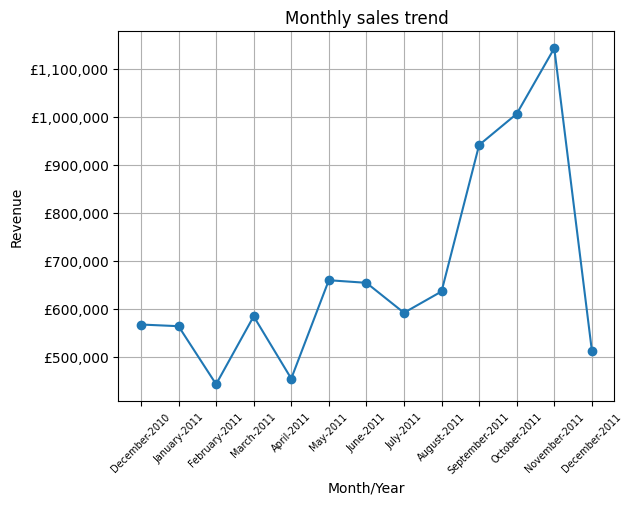

In [82]:
#plotting line graph
plt.plot(monthly_sales_trend['Month'], monthly_sales_trend["Revenue"], marker='o')

plt.xlabel("Month/Year")
plt.ylabel("Revenue")
plt.title("Monthly sales trend")

fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick) 

plt.xticks(rotation=45, fontsize=7)
plt.grid(True)
plt.show()

The monthly sales trend indicates a slow start from December through the first quarter of 2011, with sales averaging at $600,000 with slight dips in February and April. It then stabilises near the $700,000 level before experiencing a sharp increment from September till November, ranging from $950,000 to $1,150,000. Sales for the year then plunges to conclude at a similar level to how it began.

In [83]:
# revenue per days in a week
daily_sales_trend = sales.groupby(['Day'], as_index=False)['Revenue'].sum().round(2)
daily_sales_trend

,Day,Revenue
0,Friday,1462648.67
1,Monday,1328726.58
2,Sunday,786762.70
3,Thursday,1942303.77
4,Tuesday,1674571.27
5,Wednesday,1563551.59


In [84]:
# sorting by day
daily_sales_trend['Order'] = ['5', '1', '6', '4', '2', '3']
daily_sales_trend.sort_values(by='Order', inplace=True)
daily_sales_trend

,Day,Revenue,Order
1,Monday,1328726.58,1
4,Tuesday,1674571.27,2
5,Wednesday,1563551.59,3
3,Thursday,1942303.77,4
0,Friday,1462648.67,5
2,Sunday,786762.70,6


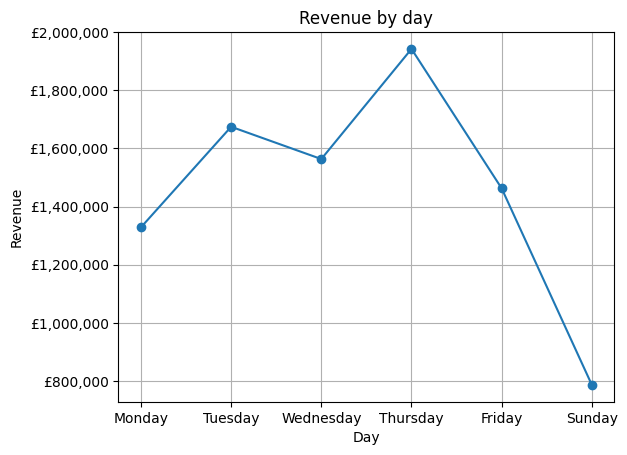

In [85]:
plt.plot(daily_sales_trend['Day'], daily_sales_trend['Revenue'], marker='o')
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.title("Revenue by day")

fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick) 

plt.grid(True)
plt.show()

The daily sales data shows an interesting observation. Sales begin at a moderate level on Monday at around \$1.3 million and rise steadily to maintain between $1.7 million and $1.6 million on Tuesday and Wednesday. It then peaks on Thursday at almost $2 million. before experiencing a 30% drop to around $1.45 million on Friday and dropping further to the lowest level of $800,000 on Sunday. This suggests a stronger weekday performance, particularly in the midweek with a significant slump in the weekend.

In [86]:
# revenue by hour
hourly_sales_trend = sales.groupby(['Hour'], as_index=False)['Revenue'].sum().round(2)
hourly_sales_trend

,Hour,Revenue
0,6,4.25
1,7,30469.21
2,8,277662.63
3,9,829042.32
4,10,1243832.58
5,11,1087369.16
6,12,1366001.91
7,13,1142366.12
8,14,971412.98
9,15,948993.18


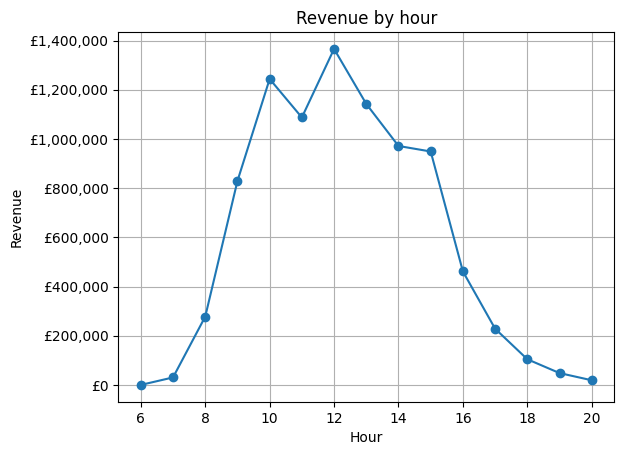

In [87]:
#plotting line graph
plt.plot(hourly_sales_trend['Hour'], hourly_sales_trend["Revenue"], marker='o')

plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.title("Revenue by hour")

fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick) 

plt.grid(True)
plt.show()

We can see that majority of sales occur in the day time, particularly near the late morning to early afternoon. Revenue begin to rise sharply from $300,000 at 8 AM to $900,000 at 10 AM before peaking at almost $1,400,000 at the midday mark. It then slowly declines through the early afternoon, with a significant drop at 3 PM to $500,000 by 4 PM. Revenue then slowly tapers off into evening. This shows us a very concentrated sales activity between 9AM and 3PM, with a very strong performance in the midday.

#### 1.2 Top contributing countries

In [88]:
# revenue by country
country = sales.groupby(['Country'], as_index=False)['Revenue'].sum().round(2)
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  36 non-null     object 
 1   Revenue  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [89]:
country.sort_values(by='Revenue', ascending=False, inplace=True)
countrytop10 = country.head(10)

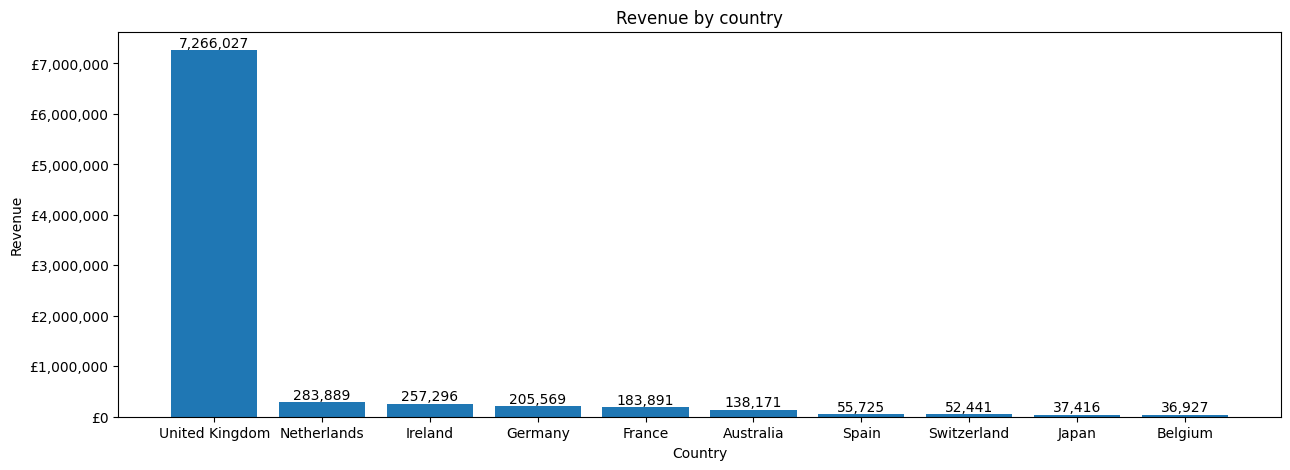

In [90]:
# plotting bar chart for revenue by country
fig, ax = plt.subplots(1,1,figsize=(15,5))
rD = ax.bar(countrytop10['Country'], countrytop10['Revenue'])
ax.set_xlabel('Country')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by country')

#setting up and applying formatting string syntax for y axis
fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

#setting locale for thousands separator
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

#function to format label with thousands separator
def format_label(value):
    return locale.format_string("%d", value, grouping=True)

#add bar labels
for bar in rD:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        format_label(height),
        ha='center',
        va='bottom'
    )

#add rotation for x labels
plt.show()

As an UK based ecommerce platform, it is natural that the majority of our revenue would come from the UK, with a staggering amount of $7.2 million. The next highest revenues come from countries in the region, namely Netherlands ($283,889), Ireland ($257,296) and Germany ($205,296). An interesting observation would be we generated revenue from countries in the APAC region, namely Australia ($138,171) and Japan ($37,416). This trend displays a very heavy reliance on our domestic market with international contributions playing a minor role.

#### 1.3 Top selling products

In [91]:
top_products = sales.groupby(['Description', 'StockCode'], as_index=False)['Quantity'].sum().round(2)
top_products.sort_values(by='Quantity', ascending=False, inplace=True)
top_products = top_products.head(20)

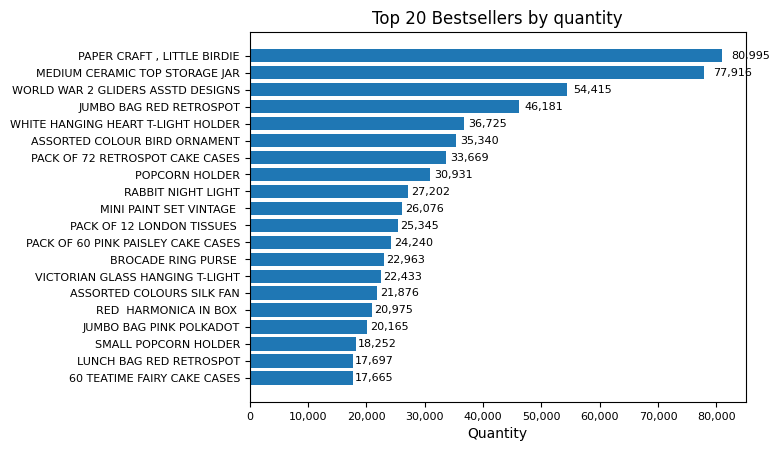

In [92]:

fig, ax = plt.subplots()
top_product_quant = ax.barh(top_products['Description'], top_products['Quantity'], align='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Quantity')
ax.set_title('Top 20 Bestsellers by quantity')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#function to format label with thousands separator
def format_label(value):
    return locale.format_string("%d", value, grouping=True)

#add bar labels
for bar in top_product_quant:
    width = bar.get_width()  # Get revenue value
    ax.text(
        width + (width * 0.02),  # Slight offset to avoid overlap
        bar.get_y() + bar.get_height() / 2,
        format_label(width),
        ha='left',
        va='center',
        fontsize=8
    )

plt.show()

In [93]:
topsellers = sales.groupby(['Description','StockCode'], as_index=False)['Revenue'].sum().round(2)
topsellers.sort_values(by='Revenue', ascending=False, inplace=True)
topsellers = topsellers.head(20)


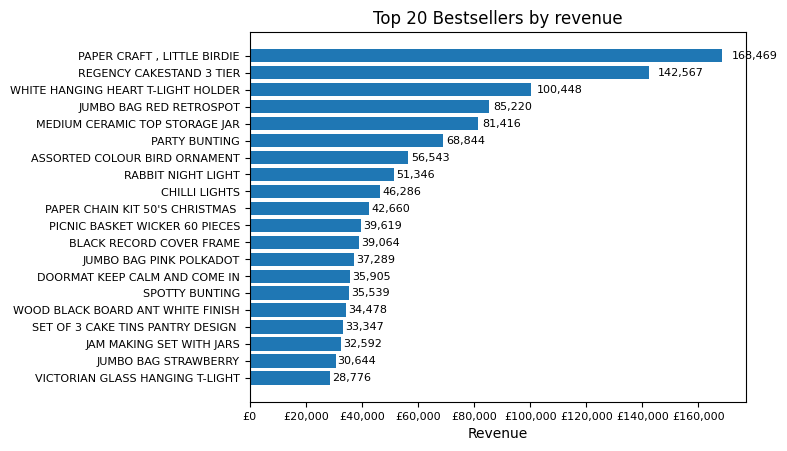

In [94]:

fig, ax = plt.subplots()
top_product_rev = ax.barh(topsellers['Description'], topsellers['Revenue'], align='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Revenue')
ax.set_title('Top 20 Bestsellers by revenue')
plt.xticks(fontsize=8)#
plt.yticks(fontsize=8)

fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#function to format label with thousands separator
def format_label(value):
    return locale.format_string("%d", value, grouping=True)

#add bar labels
for bar in top_product_rev:
    width = bar.get_width()  # Get revenue value
    ax.text(
        width + (width * 0.02),  # Slight offset to avoid overlap
        bar.get_y() + bar.get_height() / 2,
        format_label(width),
        ha='left',
        va='center',
        fontsize=8
    )

plt.show()

#### 1.4 Refunds

In [95]:
refunds = df[df['InvoiceNo'].str.contains("C")]

In [96]:
# getting count of unique InvoiceNo for refunds and total transactions
refund_count = refunds['InvoiceNo'].unique().shape[0]
total_orders = df['InvoiceNo'].unique().shape[0]
refund_perc = (refund_count/total_orders)*100
print(f"Percentage of refunds: {refund_perc:.2f}%")

Percentage of refunds: 15.52%


Each invoice is treated as a single count regardless of the number of items in the invoices. We end up at a 15% refund rate, which is an acceptable amount in a 1 year timeframe. However, maintaining a lower rate at around 10% is preferred for long-term sustainability. We can perhaps achieve that via better customer service, improving product quality, or offering an exchange option as an alternative.

In [97]:
refund_count_per_product = refunds.groupby('Description')['Quantity'].sum().abs()
refund_count_per_product.sort_values(ascending=False, inplace=True)
refund_count_per_product = refund_count_per_product.head(10)
refund_count_per_product

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         74494
ROTATING SILVER ANGELS T-LIGHT HLDR     9367
FAIRY CAKE FLANNEL ASSORTED COLOUR      3150
PINK BLUE FELT CRAFT TRINKET BOX        2617
WHITE HANGING HEART T-LIGHT HOLDER      2578
GIN + TONIC DIET METAL SIGN             2030
HERB MARKER BASIL                       1527
FELTCRAFT DOLL MOLLY                    1447
TEA TIME PARTY BUNTING                  1424
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Top refunded products')

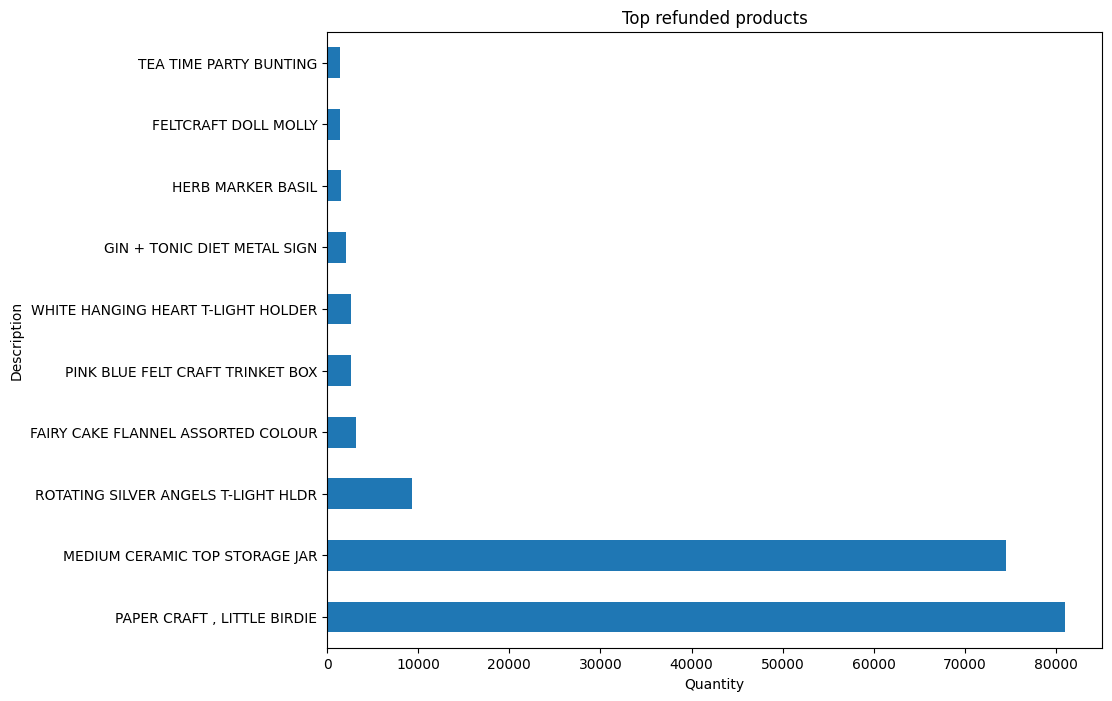

In [98]:
ref = refund_count_per_product.plot(kind='barh', figsize=(10,8))
ref.set_xlabel("Quantity")
ref.set_title("Top refunded products")


### 2. Customer Behavior Analysis

- Which customers generated the highest revenue?
- Which customers contributed the most refunds?

#### 2.1 Unique customers

In [99]:
unique_cust = df['CustomerID'].nunique()
print(f"Total Unique Customers: {unique_cust}")

Total Unique Customers: 4359


#### 2.2 Top contributing customer

In [100]:
cust_revenue = sales.groupby(['CustomerID', 'Country'], as_index=False)['Revenue'].sum().round(2)
cust_revenue.sort_values(by='Revenue', ascending=False, inplace=True)
cust_revenue.head(20)

,CustomerID,Country,Revenue
1695,14646,Netherlands,279138.02
4203,18102,United Kingdom,259657.30
3731,17450,United Kingdom,194550.79
3012,16446,United Kingdom,168472.50
1885,14911,Ireland,136275.72
56,12415,Australia,124564.53
1340,14156,Ireland,116729.63
3774,17511,United Kingdom,91062.38
0,12346,United Kingdom,77183.60
2707,16029,United Kingdom,72882.09


We can see that majority of our top 20 customers are based in the UK. However, the highest revenue contributor would be Customer 14646 from Netherlands, who has spent an impressive amount of $279,138 in the past year. This is followed closely by Customer 18102 from United Kingdom who has generated $259,657 in revenue.

Some interesting insights would be the revenue from Ireland is concentrated, with Customer 14911 and Customer 14156 accounting for nearly $250,000 combined. One of our APAC customer, Customer 12415 is ranked 6th overall with an expenditure of $124,564.

#### 2.3 Customers with the most refunds

In [106]:
top_refund_count = refunds.groupby(['CustomerID', 'Country'], as_index=False)['Quantity'].sum()
top_refund_count.sort_values(by='Quantity', ascending=True, inplace=True)
top_refund_count.head(10)

,CustomerID,Country,Quantity
1095,16446,United Kingdom,-80995
0,12346,United Kingdom,-74215
960,15838,United Kingdom,-9360
929,15749,United Kingdom,-9014
999,16029,United Kingdom,-8004
167,12931,United Kingdom,-4427
623,14607,United Kingdom,-3768
706,14911,Ireland,-3331
1453,17949,United Kingdom,-2878
853,15482,United Kingdom,-2022


The customer with the highest number of refunds would be Customer 16446, with an exceptionally high number of 80995 items refunded. Following closely is Customer 12346, who has refunded 74215 items. In comparison, the remaining customers have refunds in the thousands range, indicating two significant outliers. It would be valuable to further investigate the transaction patterns and purchasing history to identify potential reasons behind the unusually high refund count. Some reasons may be order errors, supplier issues or customer dissatisfaction.

In [107]:
refunded_invoices = refunds[['CustomerID','InvoiceNo']].drop_duplicates()
refunded_invoices = refunded_invoices.groupby(['CustomerID'], as_index=False).count().rename(columns={'InvoiceNo': 'RefundedInvoices'})
refunded_invoices.sort_values(by='RefundedInvoices', ascending=False, inplace=True)
refunded_invoices = refunded_invoices.head(10)
refunded_invoices

,CustomerID,RefundedInvoices
1434,17841,45
705,14911,44
621,14606,35
814,15311,27
213,13089,21
32,12471,18
336,13534,18
209,13078,17
386,13767,15
226,13113,15


Next, in terms of the number distinct orders refunded, Customer 17841 leads the chart with 45 refunded orders. Following closely would be Customer 14911 with 44 refunded orders, and Customer 14606 who 35 refunded orders. These customers demonstrate notably high refund activity at the order level, which could warrant further analysis to uncover any underlying patterns — such as specific products, suppliers, or even fraud — that might be contributing to these returns.